In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
def polyline_to_trip_duration(polyline):
    return max(polyline.count("[") - 2, 0) * 15

train["LEN"] = train["POLYLINE"].apply(polyline_to_trip_duration)

In [6]:
from datetime import datetime
def parse_time(x):
    dt = datetime.fromtimestamp(x["TIMESTAMP"])
    return dt.year, dt.month, dt.day, dt.hour, dt.weekday()

train[["YR", "MON", "DAY", "HR", "WK"]] = train[["TIMESTAMP"]].apply(parse_time, axis=1, result_type="expand")

In [ ]:
train['CALL_TYPE'] = train['CALL_TYPE'].replace({'A':1, 'B':2, 'C':3})
train['DAY_TYPE'] = train['DAY_TYPE'].replace({'A':1, 'B':2, 'C':3})

In [42]:
stand_data = pd.read_csv('metaData_taxistandsID_name_GPSlocation.csv')

In [49]:
train = train.merge(stand_data, how='left', left_on='ORIGIN_STAND', right_on='ID')

In [94]:
train['MISSING_DATA'] = train['MISSING_DATA'].replace({True:1, False:0})
train = train.drop(['TRIP_ID', 'DAY_TYPE', 'TIMESTAMP', 'ORIGIN_CALL', 'Descricao', 'ID'], axis=1)
train = train[train['LEN']!=0]

train.loc[train['CALL_TYPE']==1, ['ORIGIN_STAND']] = 0
train.loc[train['CALL_TYPE']==3, ['ORIGIN_STAND']] = -1

In [2]:
train.to_csv('cleaned_train.csv')

NameError: name 'train' is not defined

In [2]:
train = pd.read_csv('cleaned_train.csv', index_col=0)

In [21]:
mean, std = train["LEN"].mean(), train["LEN"].std()
median = train["LEN"].median()
print(f"{mean=} {median=} {std=}")

mean=732.0502550532805 median=615.0 std=683.8655961814885


In [22]:
outlier_threshold = 3
df_trimmed = train[train["LEN"] < mean + outlier_threshold * std]

(array([182454., 549821., 489267., 238298., 101656.,  47131.,  22169.,
         13066.,   7531.,   5099.]),
 array([  15.,  291.,  567.,  843., 1119., 1395., 1671., 1947., 2223.,
        2499., 2775.]),
 <BarContainer object of 10 artists>)

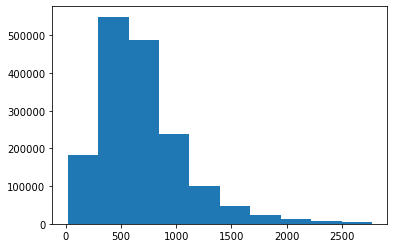

In [23]:
plt.hist(df_trimmed['LEN'])

In [3]:
import re

In [4]:
long = train['POLYLINE'][:1000000].apply(lambda x: re.findall('\[(-\d+\.\d+),', x))

In [5]:
long_coords = []
for i in long:
    long_coords += i

In [6]:
long_coords = pd.cut(list(map(float,long_coords)), 10, retbins=True)

In [8]:
lat = train['POLYLINE'][:1000000].apply(lambda x: re.findall('\,(\d+\.\d+)', x))

In [9]:
lat_coords = []
for i in lat:
    lat_coords += i

In [10]:
lat_coords = pd.cut(list(map(float,lat_coords)), 10, retbins=True)

In [12]:
binned_data = pd.DataFrame([long_coords[0], lat_coords[0]])

/tmp/ipykernel_108/3824418148.py:1: FutureWarning: The behavior of DataFrame([categorical, ...]) is deprecated and in a future version will be changed to match the behavior of DataFrame([any_listlike, ...]). To retain the old behavior, pass as a dictionary DataFrame({col: categorical, ..})
  binned_data = pd.DataFrame([long_coords[0], lat_coords[0]])


In [13]:
binned_data[2] = np.ones(len(binned_data))
binned_data = binned_data.rename(columns={0:"Longitude", 1:"Latitude"})

In [15]:
mapped_data = binned_data.groupby(["Longitude", "Latitude"])[2].count().unstack()
mapped_data = mapped_data.apply(lambda x: np.log(x+1))

In [17]:
mapped_data

Latitude,"(36.872, 38.301]","(38.301, 39.716]","(39.716, 41.131]","(41.131, 42.547]","(42.547, 43.962]","(43.962, 45.377]","(45.377, 46.792]","(46.792, 48.207]","(48.207, 49.622]","(49.622, 51.037]"
Longitude,,,,,,,,,,
"(-13.181, -12.315]",0.000000,0.693147,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
"(-12.315, -11.457]",0.000000,0.693147,0.000000,0.000000,0.0,0.000000,0.693147,0.0,0.0,0.693147
"(-11.457, -10.6]",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
"(-10.6, -9.742]",1.609438,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
"(-9.742, -8.885]",0.693147,9.628393,6.214608,0.000000,0.0,1.098612,0.000000,0.0,0.0,0.000000
"(-8.885, -8.027]",0.000000,9.682779,14.327056,17.686535,0.0,0.000000,0.000000,0.0,0.0,0.000000
"(-8.027, -7.17]",0.000000,4.290459,9.967588,10.985615,0.0,0.000000,0.000000,0.0,0.0,0.000000
"(-7.17, -6.312]",0.000000,0.000000,5.638355,8.833900,0.0,0.000000,0.000000,0.0,0.0,0.000000
"(-6.312, -5.455]",0.000000,0.693147,0.693147,0.000000,0.0,0.693147,0.000000,0.0,0.0,0.000000


In [18]:
import seaborn as sns

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

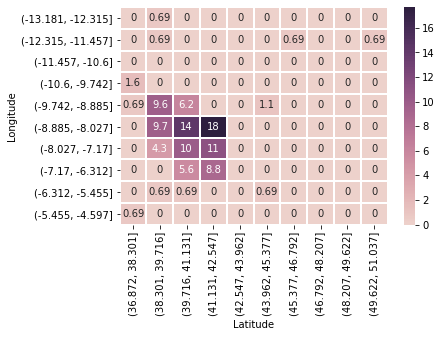

In [19]:
sns.heatmap(mapped_data, linewidths = 0.30, annot = True, cmap=sns.cubehelix_palette(as_cmap=True))